<a href="https://colab.research.google.com/github/semishen/ML100Days/blob/master/Day_020_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [2]:
# 載入需要的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


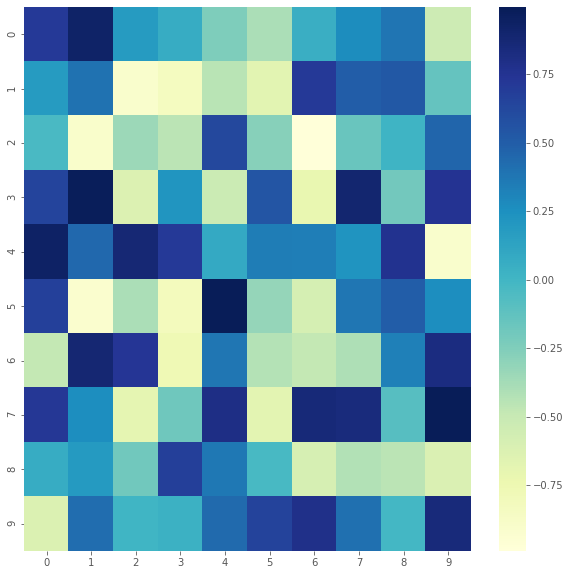

In [7]:
matrix = np.random.rand(10, 10)*2 -1
plt.figure(figsize=(10,10))

heatmap = sns.heatmap(matrix, cmap="YlGnBu")
plt.show()
plt.close()

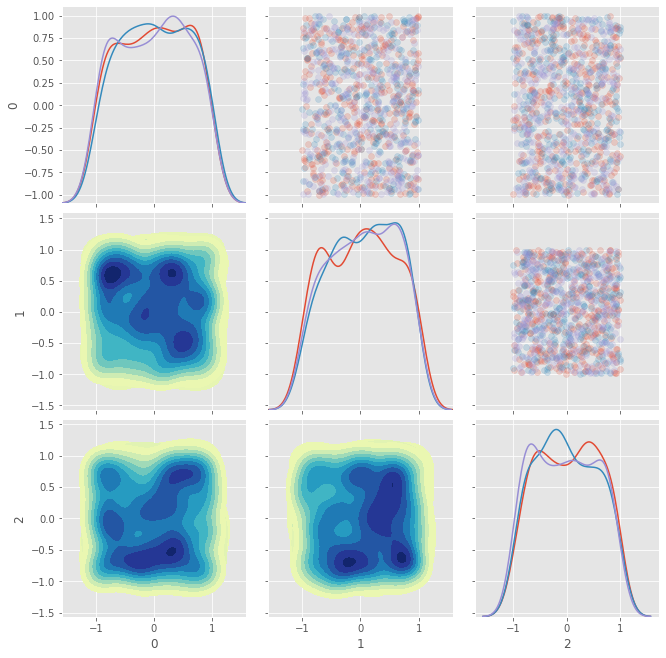

In [19]:
nrow = 1000
ncol = 3
matrix = np.random.rand(nrow, ncol)*2-1 

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()


# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

# upper scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# mid histogram
grid.map_diag(sns.kdeplot )
# density
grid.map_lower(sns.kdeplot, cmap = 'YlGnBu', shade=True, shade_lowest=False)

plt.show()
plt.close()

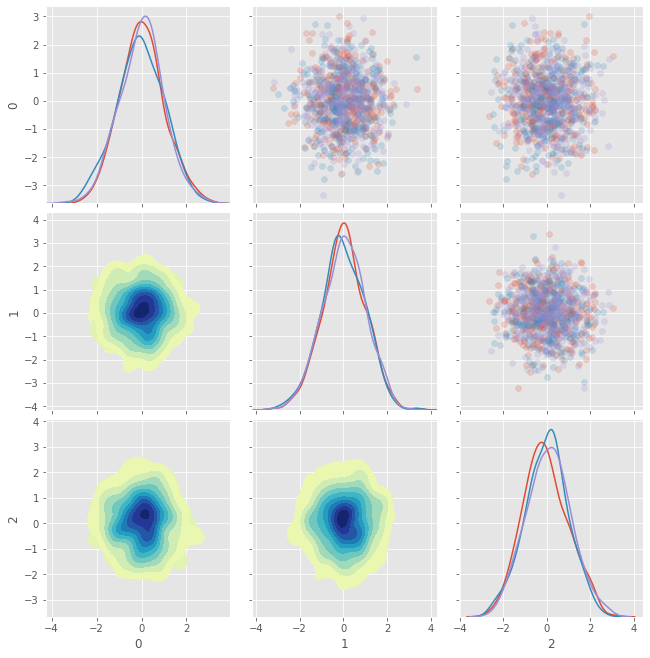

In [16]:
nrow = 1000
ncol = 3
matrix = np.random.randn(nrow, ncol) 

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

# upper scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# mid histogram
grid.map_diag(sns.kdeplot)
# density
grid.map_lower(sns.kdeplot, cmap = 'YlGnBu', shade=True, shade_lowest=False)

plt.show()
plt.close()